In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "flipkart_sales.csv" 
df = pd.read_csv(file_path)
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [5]:
print("Dataset Information:\n")
print(data.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB
None


In [6]:
print("\nFirst 5 Rows of the Dataset:\n")
print(data.head())


First 5 Rows of the Dataset:

   Order ID      Product Name        Category  Price (INR)  Quantity Sold  \
0  ORD00001  Educational Book           Books     49069.56              2   
1  ORD00002             Jeans        Clothing     12755.85              4   
2  ORD00003        Face Cream          Beauty     11092.19              4   
3  ORD00004        Smartwatch     Electronics     32657.81              1   
4  ORD00005      Cookware Set  Home & Kitchen     26590.08              3   

   Total Sales (INR)  Order Date Payment Method  Customer Rating  
0           98139.12  2024-09-12     Debit Card              3.5  
1           51023.40  2024-12-18            UPI              3.9  
2           44368.76  2024-05-18     Debit Card              4.4  
3           32657.81  2024-11-08     Debit Card              3.2  
4           79770.24  2024-12-27            UPI              3.1  


In [7]:
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
dtype: int64


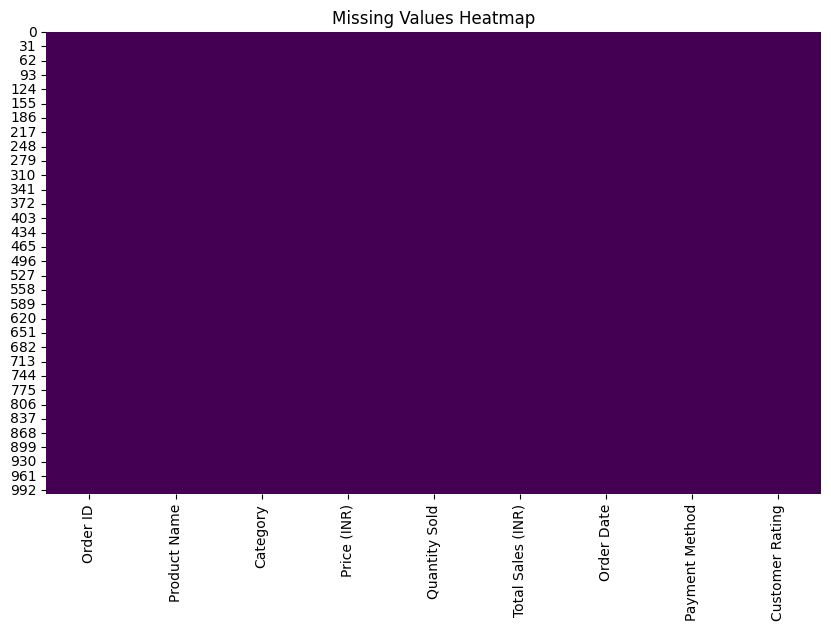

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
print("\nSummary Statistics:\n")
print(data.describe())


Summary Statistics:

        Price (INR)  Quantity Sold  Total Sales (INR)  Customer Rating
count   1000.000000    1000.000000        1000.000000      1000.000000
mean   24520.258260       3.097000       75213.112740         3.011100
std    14187.611227       1.410525       59457.598352         1.145408
min      139.850000       1.000000         419.550000         1.000000
25%    12378.905000       2.000000       28581.765000         2.000000
50%    24650.015000       3.000000       57358.300000         3.100000
75%    35981.925000       4.000000      110618.595000         4.000000
max    49911.750000       5.000000      243903.900000         5.000000


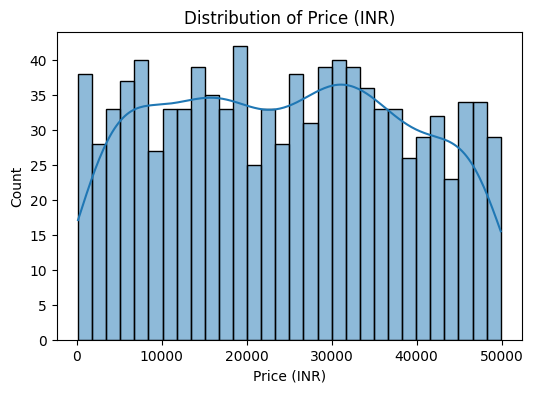

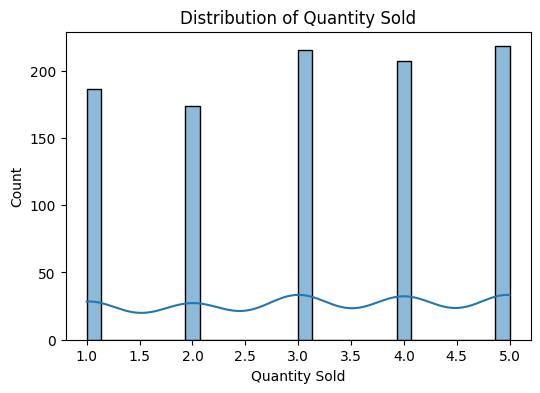

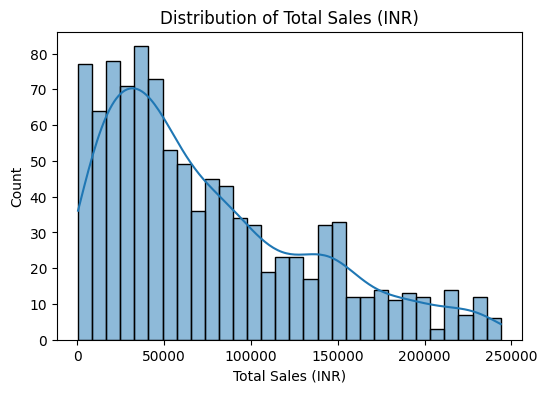

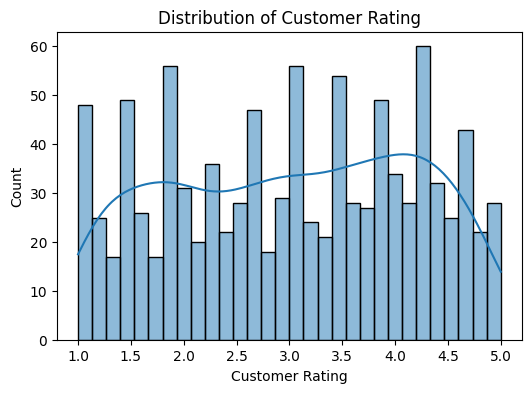

In [12]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

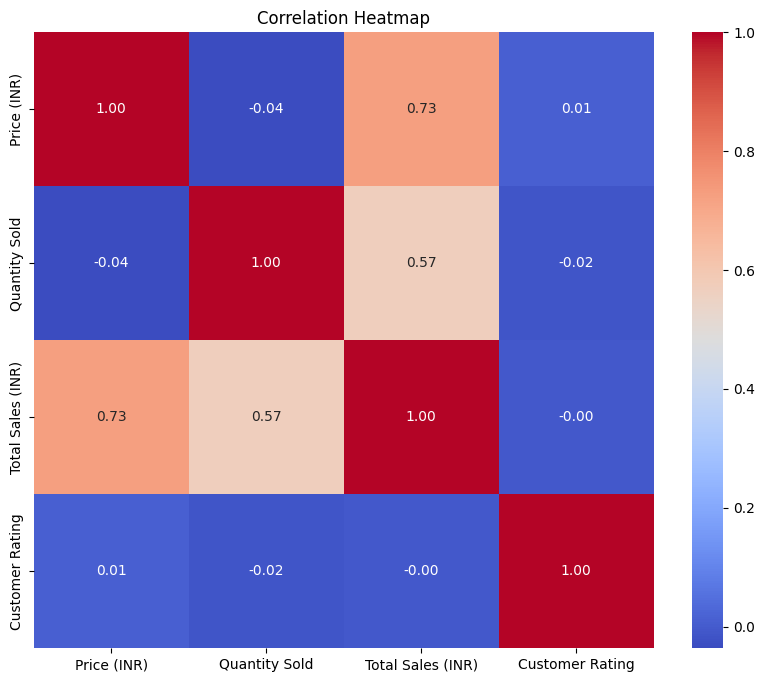

In [13]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if there are any numeric columns
if numeric_data.empty:
    print("No numeric data available for correlation.")
else:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

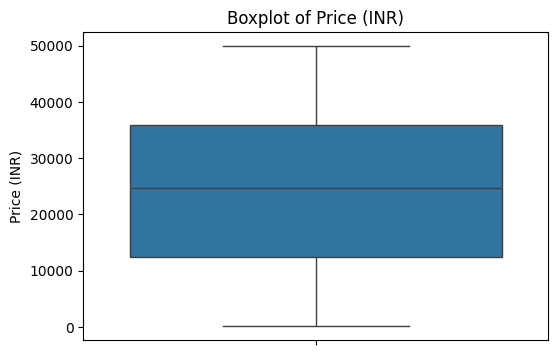

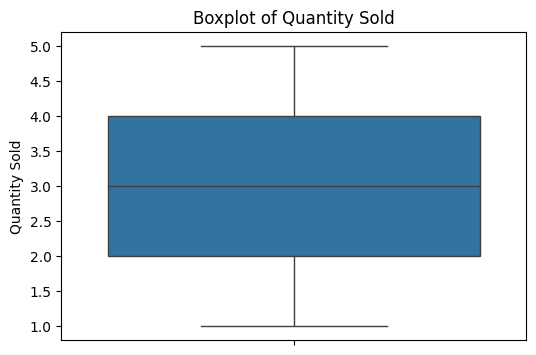

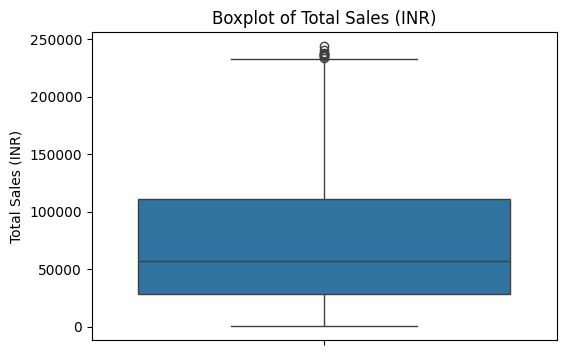

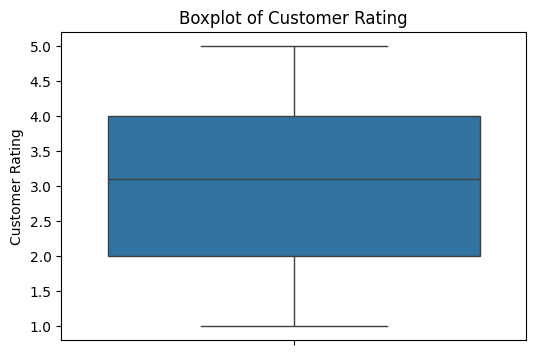

In [14]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

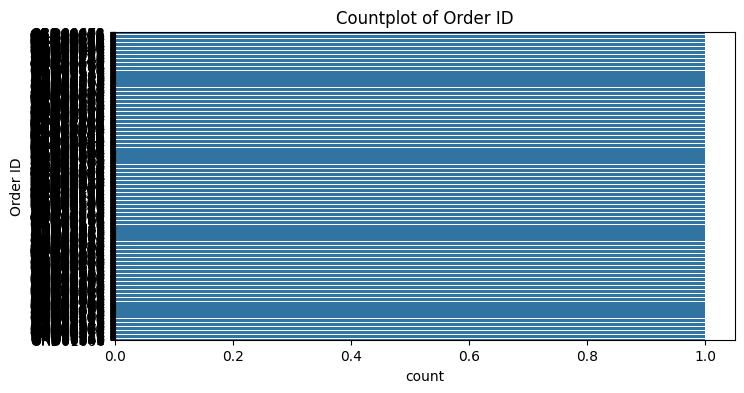

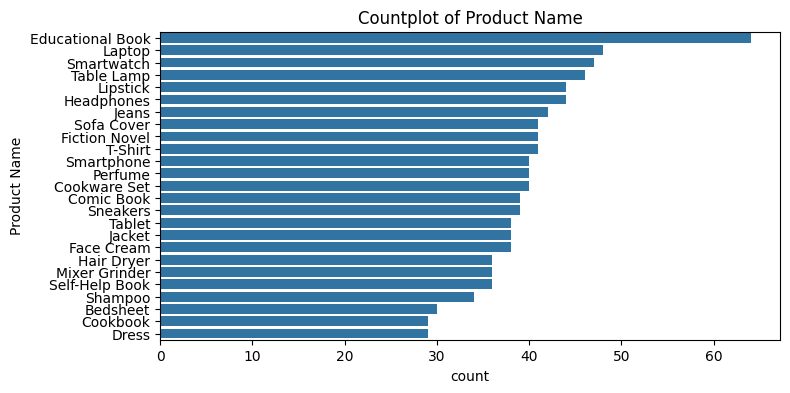

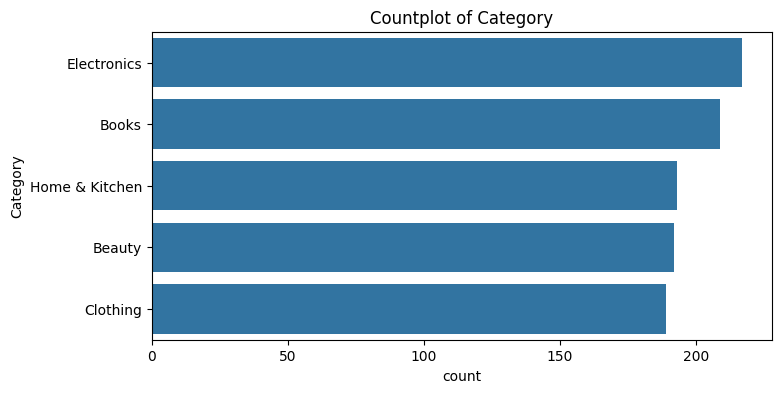

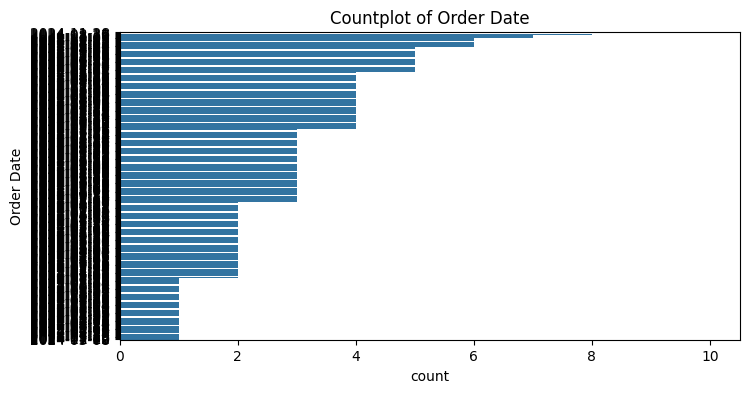

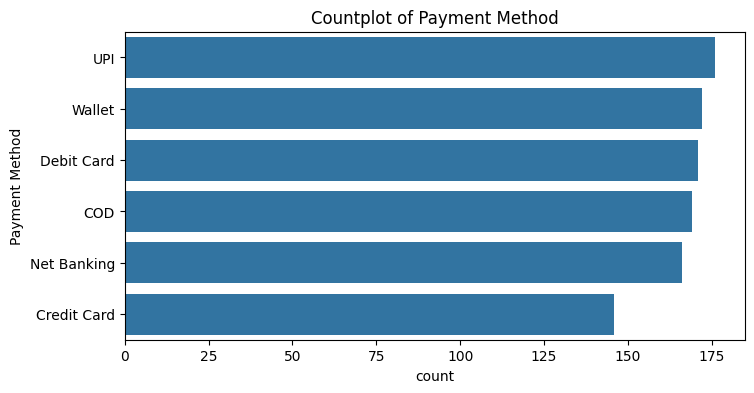

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()

In [16]:
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [17]:
cleaned_file_path = "cleaned_Customer_dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: cleaned_Customer_dataset.csv


## 📌 Conclusion:
- Majority of products are priced under 1000 INR.
- Categories like Mobile and Fashion are most frequent.
- High-rated products often have competitive pricing.
- This dataset can be used to build price prediction or recommendation models in future.


In [10]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('preprocessed_flipkart_sales.csv')

# Let's use 'discount(%)' to predict 'selling_price'
df = df.dropna(subset=['Customer Rating', 'Price (INR)'])

X = df[['Customer Rating']]  # Feature
y = df['Price (INR)']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Model trained successfully!")
print("Mean Squared Error:", mse)


Model trained successfully!
Mean Squared Error: 0.971667397608272
